In [2]:
import pandas as pd

import matplotlib.pyplot as plt

df = pd.read_csv("bestsellers with categories.csv")

print(df.head(5))
print('Shape ', df.shape)
row, col = df.shape

print("Про скільки книг зберігає дані датасет?")
print("Відповідь: ",  row)

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  
Shape  (550, 7)
Про скільки книг зберігає дані датасет?
Відповідь:  550


In [3]:

# Змінюємо регістр на малий:
df.columns = df.columns.str.lower()

# Замінюємо пробіли на нижнє підкреслення:
df.columns = df.columns.str.replace(' ', '_')

print(df.head(5))

                                                name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     author  user_rating  reviews  price  year        genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


## **Первинне дослідження даних**

In [7]:
# 1
na_counts = df.isna().sum()
print("Чи є в якихось змінних пропуски? (True / False):")
print("Відповідь: ", any(na_counts > 0))

Чи є в якихось змінних пропуски? (True / False):
Відповідь:  False


In [8]:
# 2
unique_genres = df['genre'].unique()
print("Які є унікальні жанри?")
print("Відповідь: ", unique_genres)

Які є унікальні жанри?
Відповідь:  ['Non Fiction' 'Fiction']


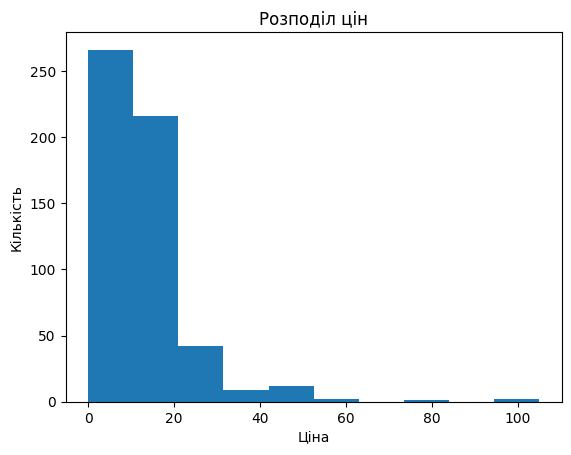

In [9]:
# 3
df['price'].plot(kind='hist', bins=10)
plt.xlabel('Ціна')
plt.ylabel('Кількість')
plt.title('Розподіл цін')
plt.show()

In [10]:
# 4
max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()


print("Максимальна ціна:", max_price)
print("Мінімальна ціна:", min_price)
print("Середня ціна:", mean_price)
print("Медіанна ціна:", median_price)

Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0


# **Пошук та сортування даних**

In [11]:
print("Який рейтинг у датасеті найвищий? Відповідь: ", df["user_rating"].max())
print("Скільки книг мають такий рейтинг? Відповідь: ", (df['user_rating'] ==df["user_rating"].max()).sum())
print("Яка книга має найбільше відгуків? Відповідь: ", df.loc[df['reviews'].idxmax(), 'name'])
print("З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь: ", df[df['year'] == 2015].sort_values(by='price', ascending=False).iloc[0]['name'] )
print("Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: ", len(df[(df['year'] == 2010) & (df['genre'] == "Fiction")]))
print("Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: ", len(df[(df['user_rating'] == 4.9) & (df['year'] == 2010) | (df['year'] == 2011)]))
cheap_books_2015 = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values(by='price')
print("Яка книга остання у відсортованому списку? Відповідь: ", cheap_books_2015.iloc[-1]['name'])

Який рейтинг у датасеті найвищий? Відповідь:  4.9
Скільки книг мають такий рейтинг? Відповідь:  52
Яка книга має найбільше відгуків? Відповідь:  Where the Crawdads Sing
З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь:  Publication Manual of the American Psychological Association, 6th Edition
Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь:  20
Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь:  50
Яка книга остання у відсортованому списку? Відповідь:  Old School (Diary of a Wimpy Kid #10)


# **Агрегування даних та з'єднання таблиць**

In [16]:

max_prices = df.groupby('genre')['price'].max()
min_prices = df.groupby('genre')['price'].min()

print("Максимальна ціна для жанру Fiction: Відповідь: ", max_prices['Fiction'])
print("Мінімальна ціна для жанру Fiction: Відповідь: ", min_prices['Fiction'])
print("Максимальна ціна для жанру Non Fiction: Відповідь: ", max_prices['Non Fiction'])
print("Мінімальна ціна для жанру Non Fiction: Відповідь: ", min_prices['Non Fiction'])

Максимальна ціна для жанру Fiction: Відповідь:  82
Мінімальна ціна для жанру Fiction: Відповідь:  0
Максимальна ціна для жанру Non Fiction: Відповідь:  105
Мінімальна ціна для жанру Non Fiction: Відповідь:  0


In [25]:

author_book_counts = df.groupby('author')['name'].count()
print("Якої розмірності вийшла таблиця? Відповідь: ", author_book_counts.shape)
print("Який автор має найбільше книг? Відповідь: ", author_book_counts.idxmax())
print("Скільки книг цього автора? Відповідь: ", author_book_counts.max())

Якої розмірності вийшла таблиця? Відповідь:  (248,)
Який автор має найбільше книг? Відповідь:  Jeff Kinney
Скільки книг цього автора? Відповідь:  12


In [29]:

author_avg_rating = df.groupby('author')['user_rating'].mean()

print("У якого автора середній рейтинг мінімальний? Відповідь: ", author_avg_rating.idxmin())
print("Який у цього автора середній рейтинг? Відповідь: ", author_avg_rating.min())


У якого автора середній рейтинг мінімальний? Відповідь:  Donna Tartt
Який у цього автора середній рейтинг? Відповідь:  3.9


In [31]:

combined_df = pd.concat([author_book_counts, author_avg_rating], axis=1)
combined_df.columns = ['Book Count', 'Avg Rating']
sorted_df = combined_df.sort_values(by=['Book Count', 'Avg Rating'], ascending=[True, True])

print("Який автор перший у списку? Відповідь: ", sorted_df.index[0])

Який автор перший у списку? Відповідь:  Muriel Barbery


## **Візуалізація**

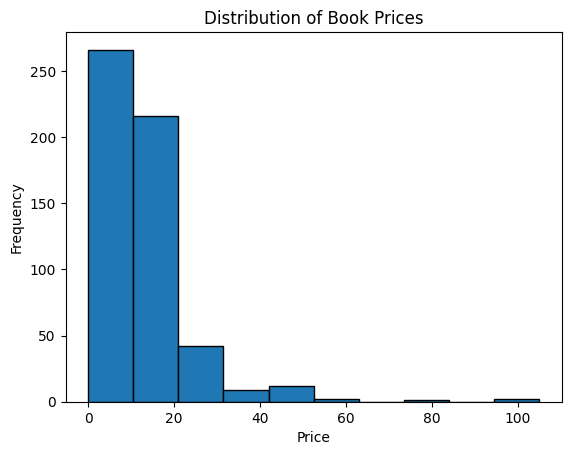

In [32]:
# 1

plt.hist(df['price'], bins=10, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Book Prices')
plt.show()

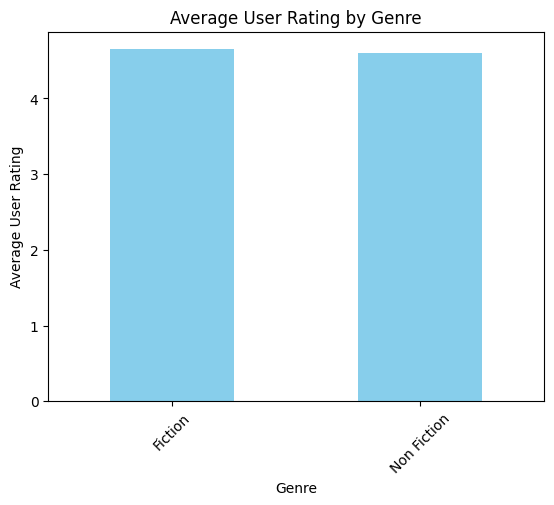

In [34]:
# 2
avg_rating_by_genre = df.groupby('genre')['user_rating'].mean()
avg_rating_by_genre.plot(kind='bar', color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Average User Rating')
plt.title('Average User Rating by Genre')
plt.xticks(rotation=45)
plt.show()

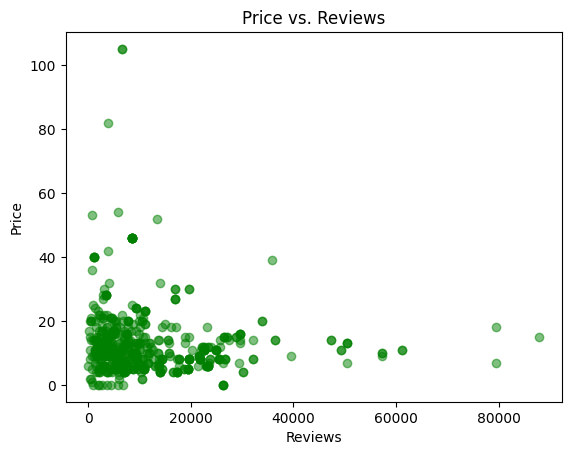

In [37]:
# 3

plt.scatter(df['reviews'], df['price'], alpha=0.5, color='green')
plt.xlabel('Reviews')
plt.ylabel('Price')
plt.title('Price vs. Reviews')
plt.show()

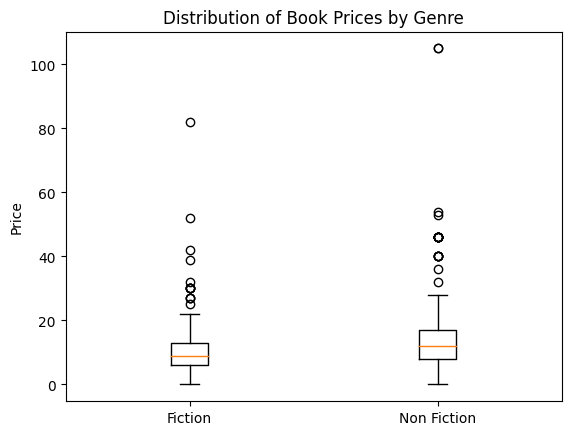

In [38]:
# 4

plt.boxplot([df[df['genre'] == 'Fiction']['price'], df[df['genre'] == 'Non Fiction']['price']], labels=['Fiction', 'Non Fiction'])
plt.ylabel('Price')
plt.title('Distribution of Book Prices by Genre')
plt.show()